# Import libraries

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from utils.functions_cycles import plot_bitcoin_cycles, calculate_cycle_percentage

# Load Data

In [2]:
# Load Bitcoin price data from a CSV file.
btc_data = pd.read_csv("../data/btc.csv", parse_dates=["time"])
# Ensure 'time' column is in datetime format, useful for time series plotting and analysis.
btc_data["time"] = pd.to_datetime(btc_data["time"])

# Data Manipulation

In [3]:
# Define Bitcoin event dates (halvings and price tops/bottoms)
halving_dates = pd.to_datetime(["2012-11-28", "2016-07-09", "2020-05-11", "2024-04-25"])
tops_dates = pd.to_datetime(["2013-11-30", "2017-12-17", "2021-11-10"])
bottoms_dates = pd.to_datetime(["2015-01-14", "2018-12-15", "2022-12-12"])

# Calculate the original frequency of major peaks to model the cyclic behavior of Bitcoin's price. (1/avg days between past peaks)
average_peak_distance = np.mean(np.diff(tops_dates).astype("timedelta64[D]").astype(int))
frequence_between_peaks = 1 / average_peak_distance  # n of peaks per day

# Create a time series with a defined range: it's the x axis used for plotting a cyclical pattern
cycle_dates = pd.date_range(start=btc_data["time"].min(), end="2026-07-31")
# Generate a sinusoidal wave based on the calculated frequency to represent cyclical patterns
cycle_wave = np.sin(2 * np.pi * frequence_between_peaks * (cycle_dates - cycle_dates[0]).days)

# Predict the next major peak date by calculating the average interval between tops and adding it to the last top
next_peak_prediction_lower = tops_dates[-1] + pd.to_timedelta(np.diff(tops_dates).astype("timedelta64[D]").astype(int)[1], "D")
next_peak_prediction = tops_dates[-1] + pd.to_timedelta(average_peak_distance, "D")
next_peak_prediction_upper = tops_dates[-1] + pd.to_timedelta(np.diff(tops_dates).astype("timedelta64[D]").astype(int)[0], "D")

# Calculate indexes for annotating cycle phases (maxima, minima, and zero crossings) on the cyclical pattern based on the sinusoidal wave
sin_maxima = (np.where((cycle_wave[:-2] < cycle_wave[1:-1]) & (cycle_wave[1:-1] > cycle_wave[2:]))[0]+ 1)
sin_minima = (np.where((cycle_wave[:-2] > cycle_wave[1:-1]) & (cycle_wave[1:-1] < cycle_wave[2:]))[0]+ 1)
sin_derivative = np.gradient(cycle_wave, axis=0)
zero_crossings = np.where(np.diff(np.sign(cycle_wave)))[0]
current = calculate_cycle_percentage(btc_data, cycle_dates, sin_minima, sin_maxima)

# Plot Bitcoin Cycles

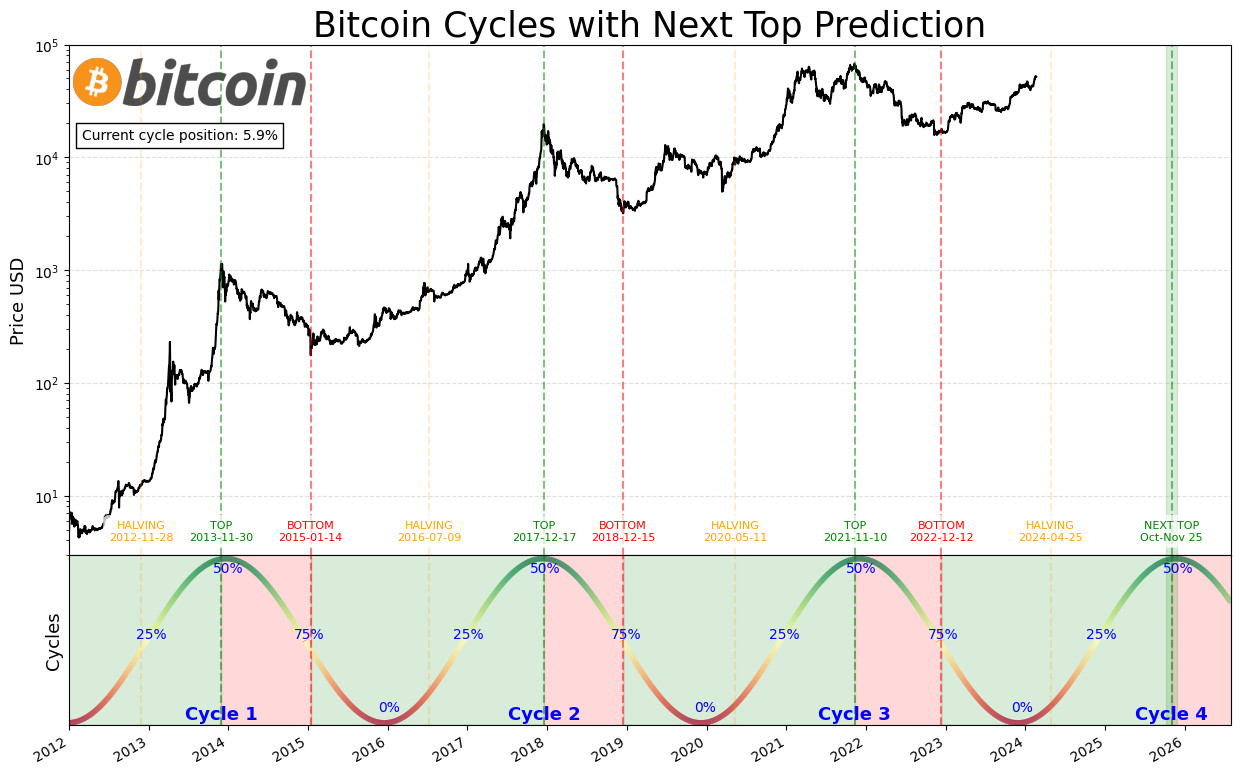

In [4]:
plot_bitcoin_cycles(
    btc_data,
    halving_dates,
    tops_dates,
    bottoms_dates,
    next_peak_prediction,
    next_peak_prediction_lower,
    next_peak_prediction_upper,
    cycle_dates,
    cycle_wave,
    sin_derivative,
    zero_crossings,
    sin_minima,
    sin_maxima,
    current
)